In [12]:
import pandas as pd
import numpy as np

# Exemplo de dados simulados
data = {
    'Date': pd.date_range(start='2009-01-01', end='2023-12-31', freq='Y'),
    'Large Cap': np.random.rand(15),
    'Small Cap': np.random.rand(15),
    'EM Equity': np.random.rand(15),
    'DM Equity': np.random.rand(15),
    'REITs': np.random.rand(15),
    'High Yield': np.random.rand(15),
    'Fixed Income': np.random.rand(15),
    'Asset Allocation': np.random.rand(15),
    'Commodities': np.random.rand(15),
    'Cash': np.random.rand(15)
}

df = pd.DataFrame(data)
df.set_index('Date', inplace=True)
df.index = df.index.year
df = df.T

colunas = []
for i in range(len(df.columns)):
    a = df.iloc[:,i].sort_values(ascending=False)
    a = pd.DataFrame(a)
    a =  a.apply(lambda x: x.index + "            " + x.apply(lambda y: f"{y:.2%}"))
    a = a.reset_index()
    a = a.iloc[:,1]
    colunas.append(a)
    
colunas

tabela_periodica = pd.concat(colunas,ignore_index=True,axis=1)

In [13]:
tabela_periodica

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,REITs 99.08%,Small Cap 99.59%,Commodities 82.56%,Small Cap 88.98%,Asset Allocation 96.05%,Commodities 75.54%,Large Cap 94.15%,REITs 98.21%,Large Cap 97.59%,Cash 97.61%,DM Equity 68.45%,EM Equity 97.74%,High Yield 84.09%,Cash 99.23%,Large Cap 99.83%
1,Small Cap 90.60%,Commodities 91.71%,Fixed Income 79.77%,High Yield 83.68%,Large Cap 80.17%,High Yield 70.98%,DM Equity 92.06%,DM Equity 89.59%,Cash 81.37%,High Yield 94.41%,Fixed Income 58.44%,REITs 79.01%,Small Cap 74.12%,Fixed Income 89.27%,Asset Allocation 80.81%
2,Fixed Income 81.96%,Asset Allocation 88.67%,Large Cap 59.20%,Asset Allocation 79.59%,REITs 78.47%,Asset Allocation 55.69%,REITs 88.42%,EM Equity 87.22%,DM Equity 69.46%,Asset Allocation 81.47%,Commodities 49.42%,Small Cap 74.89%,Cash 54.68%,Asset Allocation 87.79%,DM Equity 74.05%
3,Commodities 72.98%,EM Equity 72.28%,REITs 55.62%,EM Equity 73.73%,Fixed Income 62.91%,EM Equity 52.62%,Fixed Income 88.30%,High Yield 71.59%,Commodities 56.26%,Commodities 73.29%,Small Cap 47.35%,Fixed Income 67.59%,Fixed Income 53.74%,Commodities 64.14%,High Yield 60.85%
4,DM Equity 69.24%,Fixed Income 70.97%,High Yield 47.79%,REITs 67.33%,DM Equity 48.61%,Fixed Income 40.26%,Asset Allocation 87.30%,Commodities 54.51%,EM Equity 53.63%,Small Cap 63.95%,EM Equity 35.03%,High Yield 63.46%,EM Equity 39.65%,DM Equity 58.06%,Small Cap 56.21%
5,High Yield 49.81%,REITs 70.55%,Asset Allocation 28.77%,Large Cap 58.59%,Small Cap 44.44%,DM Equity 29.01%,Commodities 69.42%,Asset Allocation 48.09%,Asset Allocation 51.20%,REITs 55.49%,High Yield 31.88%,Large Cap 43.53%,DM Equity 34.61%,Large Cap 55.12%,Cash 49.95%
6,Asset Allocation 32.85%,High Yield 52.56%,EM Equity 28.25%,Fixed Income 56.69%,Cash 22.48%,REITs 27.21%,Cash 62.93%,Small Cap 40.36%,High Yield 45.83%,DM Equity 53.16%,Cash 30.57%,Commodities 38.68%,REITs 29.37%,EM Equity 42.02%,Fixed Income 47.23%
7,Cash 23.36%,DM Equity 40.96%,DM Equity 26.08%,Commodities 33.97%,High Yield 16.65%,Large Cap 6.21%,EM Equity 47.21%,Large Cap 33.34%,Fixed Income 35.21%,Large Cap 44.32%,REITs 27.91%,DM Equity 26.83%,Large Cap 26.37%,REITs 37.72%,REITs 46.39%
8,EM Equity 19.91%,Cash 17.49%,Small Cap 22.80%,DM Equity 24.56%,Commodities 8.89%,Cash 4.86%,Small Cap 27.62%,Fixed Income 20.31%,Small Cap 30.31%,EM Equity 42.45%,Asset Allocation 8.44%,Cash 26.42%,Commodities 10.22%,High Yield 31.84%,EM Equity 45.41%
9,Large Cap 7.94%,Large Cap 14.15%,Cash 2.56%,Cash 6.60%,EM Equity 4.88%,Small Cap 3.62%,High Yield 14.57%,Cash 13.23%,REITs 28.52%,Fixed Income 26.48%,Large Cap 1.15%,Asset Allocation 24.18%,Asset Allocation 0.93%,Small Cap 3.27%,Commodities 20.50%


In [14]:
tabela_periodica.columns = df.columns

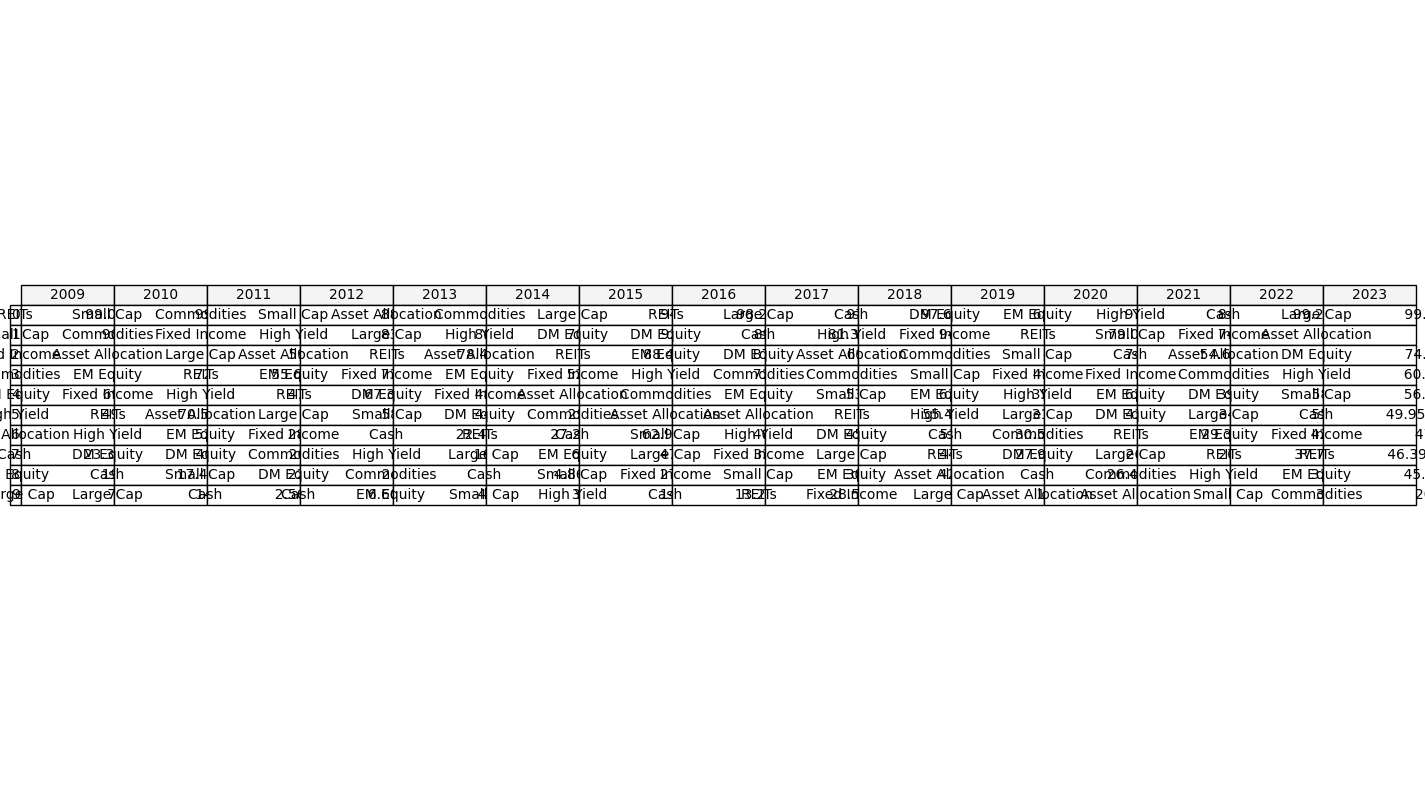

In [16]:
# Estilizar e visualizar com matplotlib
import matplotlib.pyplot as plt

# Criar uma tabela usando matplotlib
fig, ax = plt.subplots(figsize=(15, 10))

# Ocultar o eixo
ax.axis('tight')
ax.axis('off')

# Criar uma tabela
table = ax.table(cellText=tabela_periodica.values, colLabels=tabela_periodica.columns, rowLabels=tabela_periodica.index, cellLoc='center', loc='center', colColours=['#f4f4f4']*len(tabela_periodica.columns))

# Ajustar o tamanho da fonte
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()

In [15]:
tabela_periodica.to_excel('tabela_periodica.xlsx')